<a href="https://colab.research.google.com/github/Nsi20/Restaurant-Ratings/blob/main/Copy_of_Level_2_task_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

df.head()


Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:

print(df.isnull().sum())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [6]:
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])


In [7]:
print(df['Cuisines'].isnull().sum())

0


# **Task 1: Table Booking and Online Delivery**

- Determine the percentage of restaurants that
offer table booking and online delivery.

In [9]:
import pandas as pd


df_cleaned = df.dropna()

total_restaurants = len(df_cleaned)

# Percentage of restaurants that offer table booking
table_booking_count = df_cleaned[df_cleaned['Has Table booking'] == 'Yes'].shape[0]
table_booking_percentage = (table_booking_count / total_restaurants) * 100

# Percentage of restaurants that offer online delivery
online_delivery_count = df_cleaned[df_cleaned['Has Online delivery'] == 'Yes'].shape[0]
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

print(f"Percentage of restaurants that offer table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%


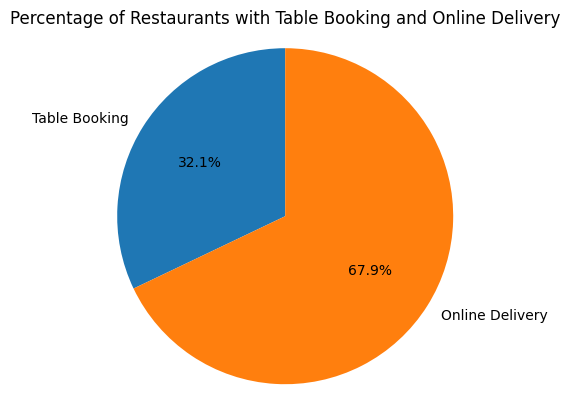

In [11]:
import matplotlib.pyplot as plt

labels = ['Table Booking', 'Online Delivery']
sizes = [table_booking_percentage, online_delivery_percentage]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Restaurants with Table Booking and Online Delivery')

plt.axis('equal')

plt.show()

- Compare the average ratings of restaurants
with table booking and those without.

In [10]:
avg_rating_with_booking = df_cleaned[df_cleaned['Has Table booking'] == 'Yes']['Aggregate rating'].mean()

avg_rating_without_booking = df_cleaned[df_cleaned['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating for restaurants with table booking: {avg_rating_with_booking:.2f}")
print(f"Average rating for restaurants without table booking: {avg_rating_without_booking:.2f}")

Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


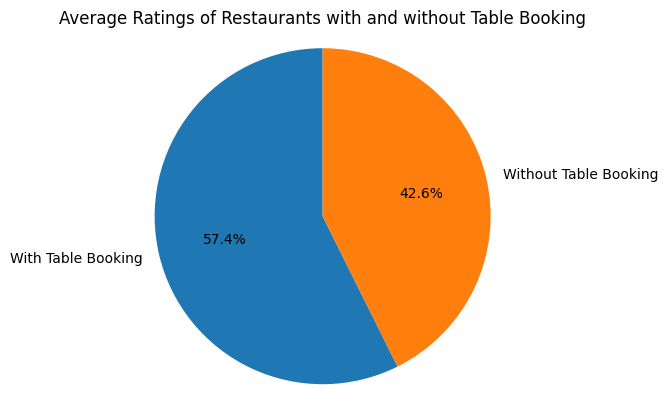

In [12]:
import matplotlib.pyplot as plt

labels = ['With Table Booking', 'Without Table Booking']
sizes = [avg_rating_with_booking, avg_rating_without_booking]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Average Ratings of Restaurants with and without Table Booking')

plt.axis('equal')

plt.show()

- Analyze the availability of online delivery
among restaurants with different price ranges.

1. Price Ranges

In [15]:
price_ranges = {
    1: 'Low',
    2: 'Medium',
    3: 'High'
}

df_cleaned['Price Range'] = df_cleaned['Price range'].map(price_ranges)

In [14]:
online_delivery_by_price = df_cleaned.groupby('Price Range')['Has Online delivery'].value_counts(normalize=True)

print(online_delivery_by_price)


Price Range  Has Online delivery
High         No                     0.708097
             Yes                    0.291903
Low          No                     0.842259
             Yes                    0.157741
Medium       No                     0.586894
             Yes                    0.413106
Name: proportion, dtype: float64


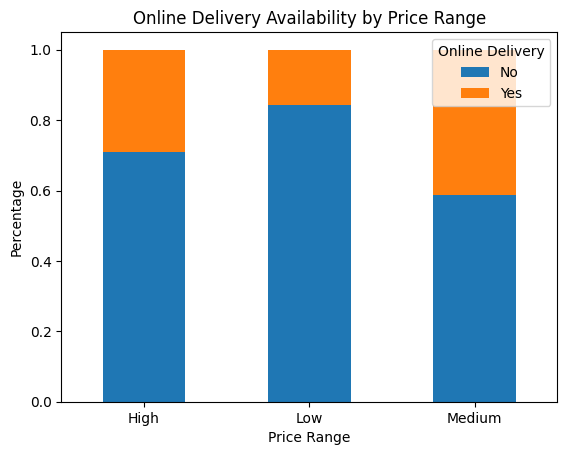

In [16]:
online_delivery_by_price.unstack().plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery')
plt.show()

# **Task 2: Price Range Analysis**

- Determine the most common price range
among all the restaurants.

In [17]:
price_range_counts = df_cleaned['Price Range'].value_counts()

most_common_price_range = price_range_counts.idxmax()

print(f"The most common price range is: {most_common_price_range}")

The most common price range is: Low


- Calculate the average rating for each price
range.

In [18]:
average_rating_by_price = df_cleaned.groupby('Price Range')['Aggregate rating'].mean()

print(average_rating_by_price)

Price Range
High      3.683381
Low       1.999887
Medium    2.941054
Name: Aggregate rating, dtype: float64


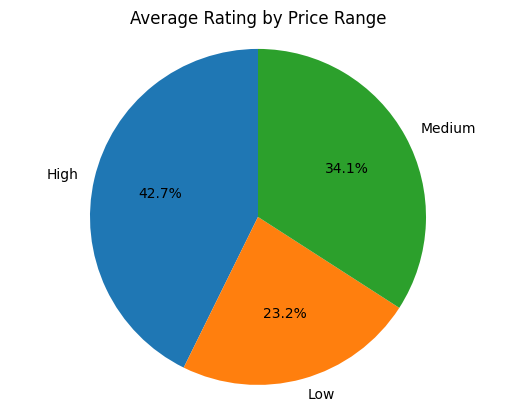

In [19]:
import matplotlib.pyplot as plt

average_ratings = average_rating_by_price.values
price_ranges = average_rating_by_price.index

plt.pie(average_ratings, labels=price_ranges, autopct='%1.1f%%', startangle=90)
plt.title('Average Rating by Price Range')
plt.axis('equal')
plt.show()

- Identify the color that represents the highest
average rating among different price ranges.

In [20]:
import matplotlib.pyplot as plt

highest_rating_index = average_ratings.argmax()

color_of_highest_rating = plt.cm.get_cmap()(highest_rating_index / len(average_ratings))

print(f"The color representing the highest average rating is: {color_of_highest_rating}")

The color representing the highest average rating is: (0.267004, 0.004874, 0.329415, 1.0)


<ipython-input-20-64c129790f39>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_of_highest_rating = plt.cm.get_cmap()(highest_rating_index / len(average_ratings))


# **Task 3: Feature Engineering**


- Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

In [21]:
df_cleaned['Restaurant Name Length'] = df_cleaned['Restaurant Name'].apply(len)

df_cleaned['Address Length'] = df_cleaned['Address'].apply(len)

In [22]:
import pandas as pd

data = {'Restaurant Name': ['Restaurant A', 'Cafe B', 'Diner C'], 'Address': ['123 Main St', '456 Oak Ave', '789 Pine Ln']}
df = pd.DataFrame(data)

df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

print(df)

  Restaurant Name      Address  Restaurant Name Length  Address Length
0    Restaurant A  123 Main St                      12              11
1          Cafe B  456 Oak Ave                       6              11
2         Diner C  789 Pine Ln                       7              11


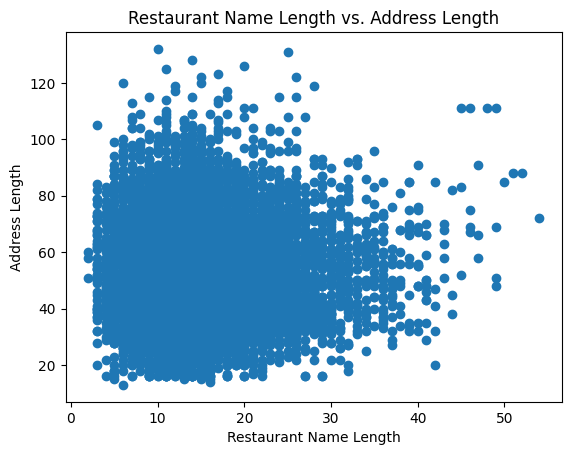

In [23]:
import matplotlib.pyplot as plt

# Creating a scatter plot
plt.scatter(df_cleaned['Restaurant Name Length'], df_cleaned['Address Length'])
plt.title('Restaurant Name Length vs. Address Length')
plt.xlabel('Restaurant Name Length')
plt.ylabel('Address Length')
plt.show()

- Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

In [24]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
encoder = LabelEncoder()

df_cleaned['Has Table Booking Encoded'] = encoder.fit_transform(df_cleaned['Has Table booking'])
df_cleaned['Has Online Delivery Encoded'] = encoder.fit_transform(df_cleaned['Has Online delivery'])

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {'Has Table booking': ['Yes', 'No', 'Yes'], 'Has Online delivery': ['No', 'Yes', 'Yes']}
df = pd.DataFrame(data)

# Encoding categorical variables
encoder = LabelEncoder()
df['Has Table Booking Encoded'] = encoder.fit_transform(df['Has Table booking'])
df['Has Online Delivery Encoded'] = encoder.fit_transform(df['Has Online delivery'])

# Displaying the updated DataFrame
print(df)

  Has Table booking Has Online delivery  Has Table Booking Encoded  \
0               Yes                  No                          1   
1                No                 Yes                          0   
2               Yes                 Yes                          1   

   Has Online Delivery Encoded  
0                            0  
1                            1  
2                            1  
